## Asymptotic and finite-$N$ effects of eigenvalue spectrum

Here we produce four supplementary plots.

1. Comparison of analytical and numerical eigenvalue spectrum as a function of network size $N$, when projected on real axis.

2. Analytical eigenvalue spectrum with finite-$N$ smoothing corrections.

3. Marginal eigenvalue density around zero on real axis. This shows that density increases with $N$ to approach the asymptotic limit.

4. Turing density as a function of $N$. This shows a maximum for small $N$.

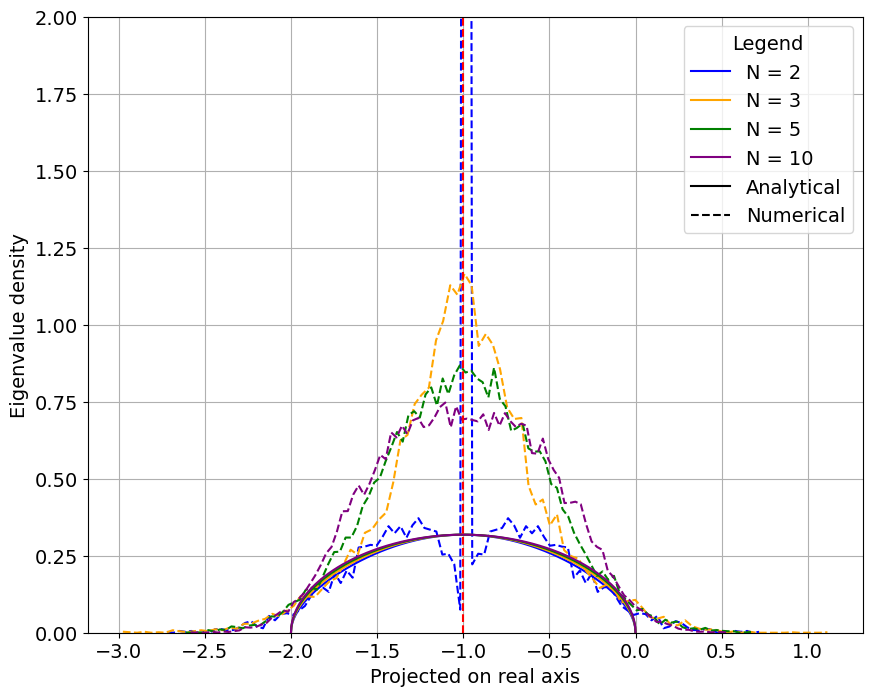

<Figure size 640x480 with 0 Axes>

In [113]:
import numpy as np
import matplotlib.pyplot as plt

# Define the analytical density function
def analytical_density(x, gamma, N):
    """
    Approximate eigenvalue density near the real axis.
    
    Parameters:
        x (ndarray): Real axis values.
        gamma (float): Radius of the eigenvalue circle.
        N (int): Matrix size.
        
    Returns:
        ndarray: Density values.
    """
    density = (1 / np.pi) * np.sqrt(np.maximum(gamma**2 - (x + 1)**2, 0))
    smoothing = np.exp(-(x + 1)**2 / (2 * gamma**2 * N))  # Example smoothing
    return density * smoothing

# Define parameters
x_values = np.linspace(-2, 0, 1000)  # Real axis range
gamma = 1  # Fixed eigenvalue radius for all N
N_values = [2, 3, 5, 10]  # Matrix sizes

# Generate numerical eigenvalues for random matrices
def generate_random_jacobian(N, sigma):
    J = np.random.normal(0, sigma, (N, N))
    np.fill_diagonal(J, -1)
    return J

def compute_eigenvalues(N, sigma, num_samples=5000):
    eigenvalues = []
    for _ in range(num_samples):
        J = generate_random_jacobian(N, sigma)
        eigenvalues.extend(np.linalg.eigvals(J))
    return np.array(eigenvalues)

# Generate numerical data
sigma_values = [1 / np.sqrt(N) for N in N_values]
eigenvalue_data = {N: compute_eigenvalues(N, sigma, num_samples=5000) for N, sigma in zip(N_values, sigma_values)}

# Plot the comparison
plt.figure(figsize=(10, 8))
colors = ['blue', 'orange', 'green', 'purple', 'brown']  # Colors for each N

for idx, N in enumerate(N_values):
    # Numerical density
    eigenvalues = eigenvalue_data[N]
    real_parts = np.real(eigenvalues)
    hist, bins = np.histogram(real_parts, bins=100, density=True)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    plt.plot(bin_centers, hist, linestyle='--', color=colors[idx])  # Numerical

    # Analytical density
    density = analytical_density(x_values, gamma, N)
    plt.plot(x_values, density, linestyle='-', color=colors[idx])  # Analytical

# Add visual marker for the center of the eigenvalue circle
plt.axvline(-1, color='red', linestyle='--', label='Center of Circle (x = -1)')

# Add compact legend
legend_elements = [
    plt.Line2D([0], [0], color=color, label=f'N = {N}')
    for color, N in zip(colors, N_values)
]
legend_elements.append(plt.Line2D([0], [0], color='black', linestyle='-', label='Analytical'))
legend_elements.append(plt.Line2D([0], [0], color='black', linestyle='--', label='Numerical'))
plt.legend(handles=legend_elements, title="Legend", frameon=True)

# Set font size globally
plt.rcParams.update({'font.size': 14})  # Increase font size globally

# Final plot adjustments
plt.xlabel("Projected on real axis")
plt.ylabel("Eigenvalue density")
plt.ylim(0, 2)  # Cap density for better visualization
plt.grid()

# Save the plot as a PNG image
plt.savefig("Comparison_analytical_numerical_eigenvalue_density.png", dpi=300, bbox_inches='tight')  # Save as PNG with high resolution

plt.show()

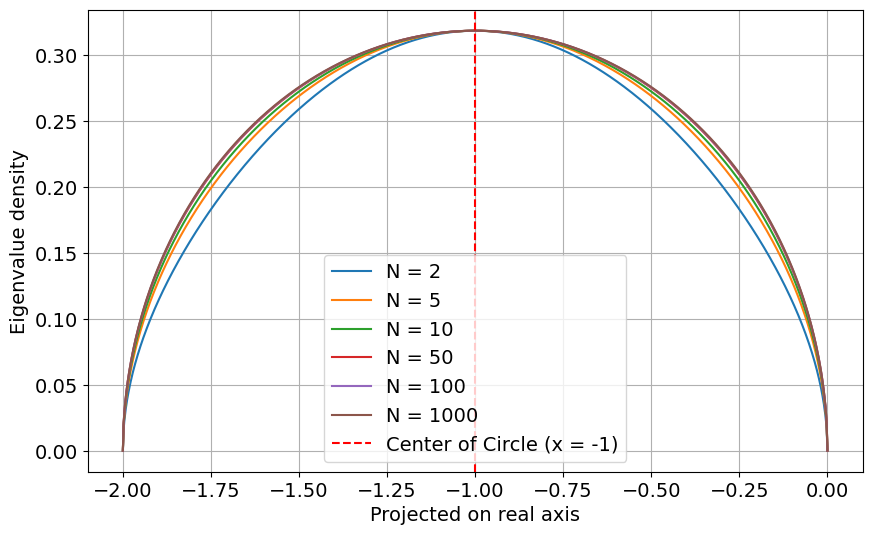

In [115]:
import numpy as np
import matplotlib.pyplot as plt

# Define the corrected density function with gamma = 1
def fixed_gamma_density(x, N):
    """
    Compute the eigenvalue density for gamma = 1 and incorporate finite-N corrections.
    
    Parameters:
        x (float or ndarray): Real axis values.
        N (int): Matrix size.
        
    Returns:
        float or ndarray: Density values.
    """
    gamma = 1  # Fixed radius due to Turing pinning
    density = (1 / np.pi) * np.sqrt(np.maximum(gamma**2 - (x + 1)**2, 0))
    smoothing = np.exp(-(x + 1)**2 / (2 * gamma**2 * N))  # Gaussian smoothing
    return density * smoothing

# Define x values and compute density for different N
x_values = np.linspace(-2, 0, 1000)  # Real axis range
N_values = [2, 5, 10, 50, 100, 1000]  # Matrix sizes
densities_fixed_gamma = {N: fixed_gamma_density(x_values, N) for N in N_values}


# Set font size globally
plt.rcParams.update({'font.size': 14})  # Increase font size globally


# Plot the density for fixed gamma = 1 and different N
plt.figure(figsize=(10, 6))
for N in N_values:
    plt.plot(x_values, densities_fixed_gamma[N], label=f'N = {N}')

plt.axvline(-1, color='red', linestyle='--', label='Center of Circle (x = -1)')
#plt.title("Eigenvalue Density for Fixed Gamma = 1 with Finite-N Corrections")
plt.xlabel("Projected on real axis")
plt.ylabel("Eigenvalue density")
plt.legend()
plt.grid()

# Save the plot as a PNG image
plt.savefig("Projected_real_eigenvalue_density.png", dpi=300, bbox_inches='tight')  # Save as PNG with high resolution


plt.show()

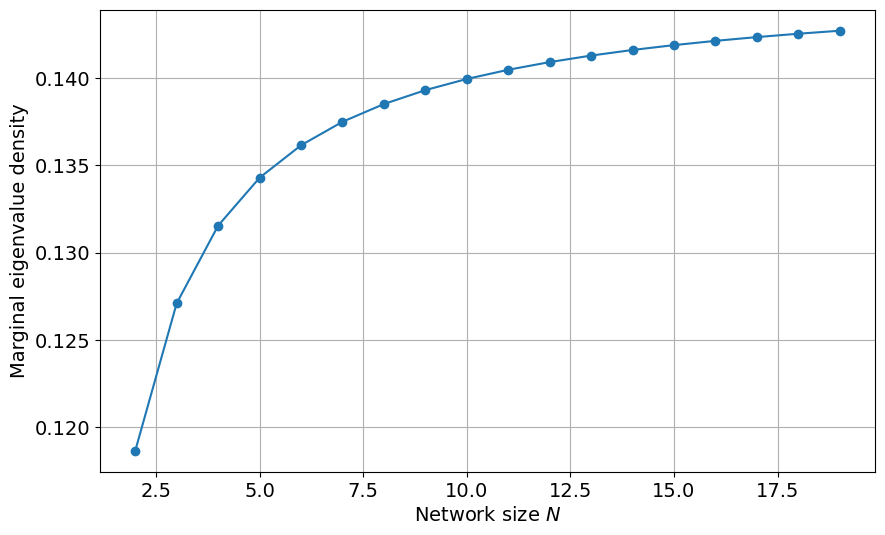

In [114]:
import numpy as np
import matplotlib.pyplot as plt

# Correct the density at x = 0 by introducing finite-N smoothing corrections
def smoothed_density_at_zero(N_values, gamma):
    """
    Compute the density at x = 0 with finite-N smoothing corrections.
    
    Parameters:
        N_values (list of int): List of N values (matrix sizes).
        gamma (float): Radius of the eigenvalue circle (adjusted to > 1).
        
    Returns:
        list: Density values at x = 0 for each N.
    """
    densities = []
    for N in N_values:
        # Compute the density with smoothing factor
        base_density = (1 / np.pi) * np.sqrt(np.maximum(gamma**2 - 1, 0))
        smoothing_factor = np.exp(-1 / (2 * gamma**2 * N))  # Smoothing correction at x = 0
        density = base_density * smoothing_factor
        densities.append(density)
    return densities

# Define N values
N_values = np.arange(2, 20, 1)  # N from 2 to 200, step 2

# Calculate smoothed density at x = 0 for increasing N
smoothed_density_values = smoothed_density_at_zero(N_values, gamma=1.1)

# Set font size globally
plt.rcParams.update({'font.size': 14})  # Increase font size globally

# Plot the smoothed density values
plt.figure(figsize=(10, 6))
plt.plot(N_values, smoothed_density_values, marker='o')#, label=r'$\rho(0)$ (Smoothed, $\gamma = 1.1$)')
#plt.title("Smoothed Density at x = 0 as a Function of N (Finite-N Corrections)")
plt.xlabel("Network size $N$")
plt.ylabel("Marginal eigenvalue density")
plt.grid()
#plt.legend()


# Save the plot as a PNG image
plt.savefig("Marginal_eigenvalue_density.png", dpi=300, bbox_inches='tight')  # Save as PNG with high resolution


plt.show()

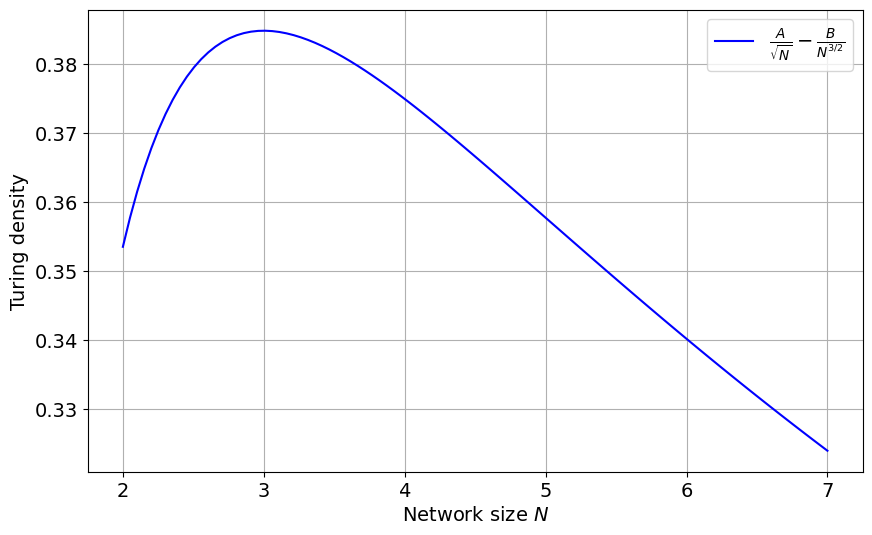

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
A=1
B=1

# Define the function
def density_function(N):
    """
    Compute the function 1/N^(1/2) - 1/(N^(3/2)).
    
    Parameters:
        N (ndarray): Array of N values (matrix sizes).
        
    Returns:
        ndarray: Density values.
    """
    #return 1 / N**0.5 - 1 / (N**(3/2))
    
    #return np.exp(-1/(2*N))/ N**0.5 #- 1 / (N**(3/2))

    return A/ N**0.5 - B / N**(3/2)

# Define N values for the plot
N_values = np.linspace(2, 7, 100)  # N from 1 to 50
density_values = density_function(N_values)

# Set font size globally
plt.rcParams.update({'font.size': 14})  # Increase font size globally

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(N_values, density_values, label=r"$\frac{A}{\sqrt{N}} - \frac{B}{N^{3/2}}$", color="blue")
plt.xlabel("Network size $N$")
plt.ylabel("Turing density")
plt.legend()
plt.grid()

# Save the plot as a PNG image
plt.savefig("Turing_density_plot.png", dpi=300, bbox_inches='tight')  # Save as PNG with high resolution

# Show the plot
plt.show()
